# Paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Datos

In [ ]:
df1 = pd.read_excel("2024-03.xlsx")
df2 = pd.read_excel("dim_socio.xlsx")

In [ ]:
df2 = df2.drop_duplicates(subset=['CUENTA'])

In [ ]:
df1['mora'] = df1['DIAS ATRASADO'].apply(lambda x: 1 if x > 31 else 0)
df1['OTORGA'] = pd.to_datetime(df1['OTORGA'])
#df1 = df1[df1['OTORGA'] >= '2023-04-01']

In [ ]:
df1['OTORGA']

0      2024-02-26
1      2024-02-27
2      2024-01-02
3      2022-08-25
4      2024-02-21
          ...    
9166   2022-08-18
9167   2024-02-26
9168   2024-03-18
9169   2024-03-22
9170   2023-08-03
Name: OTORGA, Length: 9171, dtype: datetime64[ns]

In [ ]:
mes_actual = 3
año_actual = 2024
df1['mes_otorga'] = df1['OTORGA'].dt.month
df1['año_otorga'] = df1['OTORGA'].dt.year
df1['maduracion'] = (año_actual - df1['año_otorga']) * 12 + (mes_actual - df1['mes_otorga'])

In [ ]:
prod = ["CAMPAÑA", "CONSUMO FORMAL", "CONSUMO INFORMAL", "CREDITO DIGITAL",
        "DIGITAL EMPRENDEDOR", "GARANTIA LIQUIDA", "MAS INCLUSIVO",
        "MAS INCLUSIVO SEMANAL", "MAS VELOZ", "MI PRIMER CREDITO", "MI PRIMER NEGOCIO",
        "NEGOCIO (CT)", "NEGOCIO INVERSION", "PAGA DIARIO (CT)", "PYME 1", "PYME 2",
        "PYME 3", "RAPIDIN (CT)", "RAPIDIN INVERSION", "SEMANAL MICRO"]

df1 = df1[df1['PRODUCTO'].isin(prod)]

In [ ]:
nm1 = ["CUENTA", "MONTO PRES", "SALDO PRES", "mora", "PRODUCTO","maduracion"]
nm2 = ["CUENTA", "EDAD", "ESTADO_CIVIL", "SEXO", "AGENCIA", "TIPO_VIVIENDA"]
data = pd.merge(df1[nm1], df2[nm2], on="CUENTA", how="left")

In [ ]:
data.drop('CUENTA', axis=1, inplace=True)

In [ ]:
data

,MONTO PRES,SALDO PRES,mora,PRODUCTO,maduracion,EDAD,ESTADO_CIVIL,SEXO,AGENCIA,TIPO_VIVIENDA
0,1215.0,862.19,0,MAS INCLUSIVO,1,37,Soltero (a),M,1,PROPIA
1,3300.0,2523.43,0,PAGA DIARIO (CT),1,58,Soltero (a),F,3,PROPIA
2,11120.0,10655.97,0,NEGOCIO INVERSION,2,28,Soltero (a),F,1,ALQUILADA
3,890.0,452.05,1,MAS INCLUSIVO,19,40,Conviviente,F,5,FAMILIAR
4,565.0,299.46,0,MAS INCLUSIVO,1,57,Soltero (a),M,4,FAMILIAR
...,...,...,...,...,...,...,...,...,...,...
8615,5060.0,886.40,0,RAPIDIN (CT),19,44,Soltero (a),M,1,PROPIA
8616,2200.0,1908.86,0,MAS INCLUSIVO,1,35,Soltero (a),F,2,FAMILIAR
8617,1660.0,1381.58,0,PAGA DIARIO (CT),0,24,Soltero (a),F,8,FAMILIAR
8618,5535.0,5303.35,0,SEMANAL MICRO,0,43,Soltero (a),M,1,ALQUILADA


<Axes: ylabel='Frequency'>

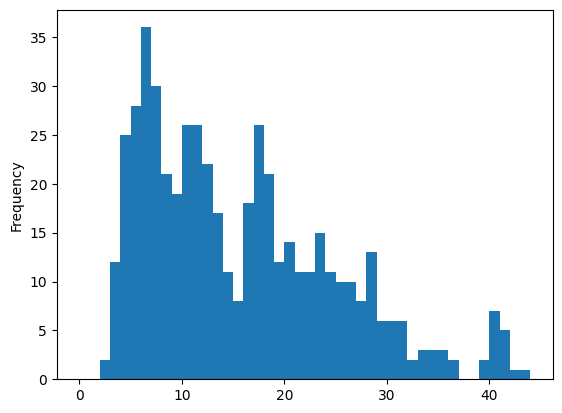

In [ ]:
data.query(" PRODUCTO == 'NEGOCIO INVERSION' ").maduracion.plot.hist(bins=np.arange(0,45,1))

<Axes: ylabel='Frequency'>

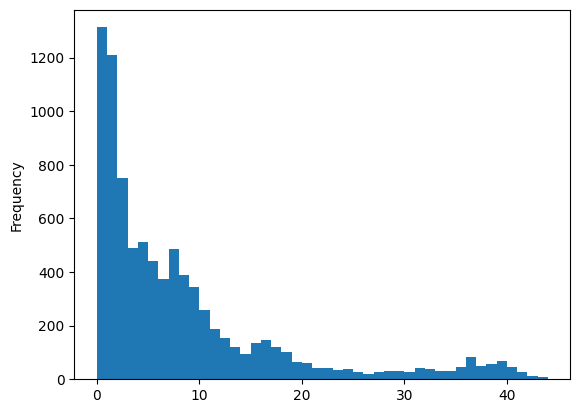

In [ ]:
data.maduracion.plot.hist(bins=np.arange(0,45,1))

<Axes: xlabel='PRODUCTO'>

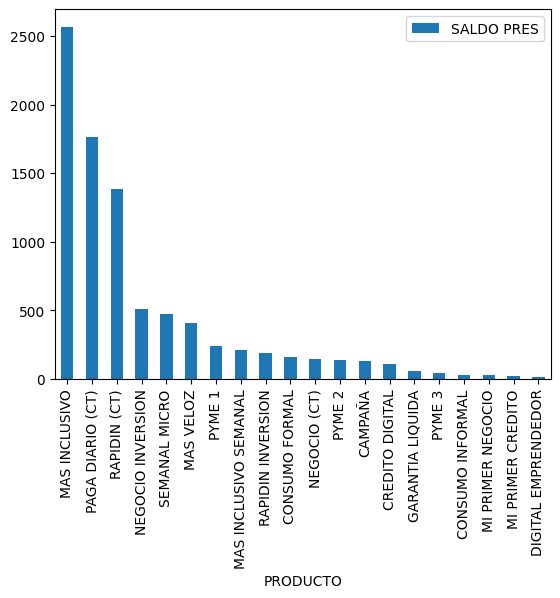

In [ ]:
data.groupby("PRODUCTO").agg({'SALDO PRES':'count'}).sort_values("SALDO PRES",ascending=False).plot(kind='bar')#.to_excel("salida.xlsx")

<Axes: xlabel='PRODUCTO'>

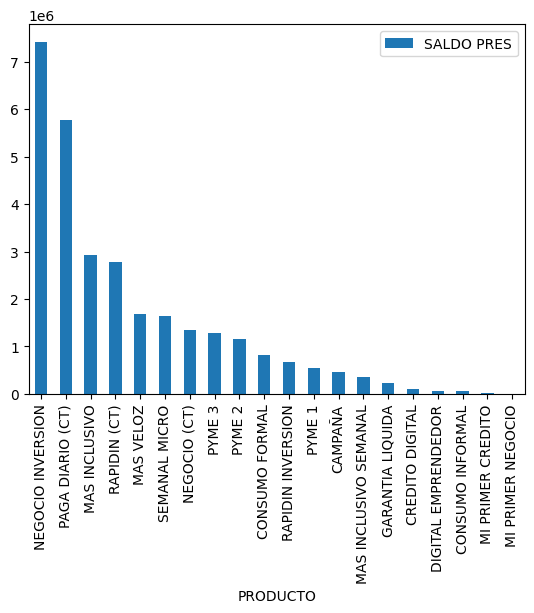

In [ ]:
data.groupby("PRODUCTO").agg({'SALDO PRES':'sum'}).sort_values("SALDO PRES",ascending=False).plot(kind='bar')#.to_excel("salida.xlsx")

<Axes: xlabel='PRODUCTO'>

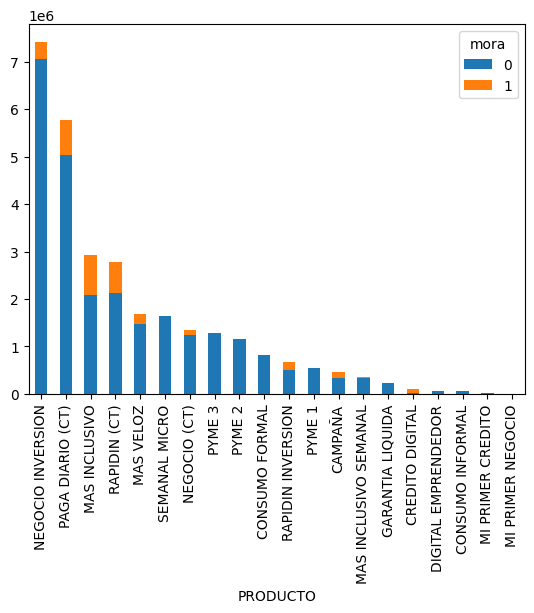

In [ ]:
data.pivot_table(index='PRODUCTO',columns='mora',aggfunc='sum',values='SALDO PRES',margins=True).sort_values('All',ascending=False)[[0,1]][1:].plot(kind='bar', stacked=True)

<Axes: xlabel='PRODUCTO'>

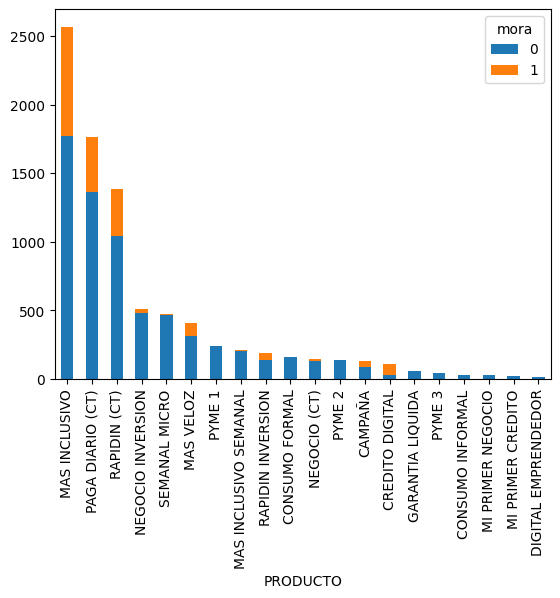

In [ ]:
data.pivot_table(index='PRODUCTO',columns='mora',aggfunc='count',values='SALDO PRES',margins=True).sort_values('All',ascending=False)[[0,1]][1:].plot(kind='bar', stacked=True)

<Axes: xlabel='maduracion'>

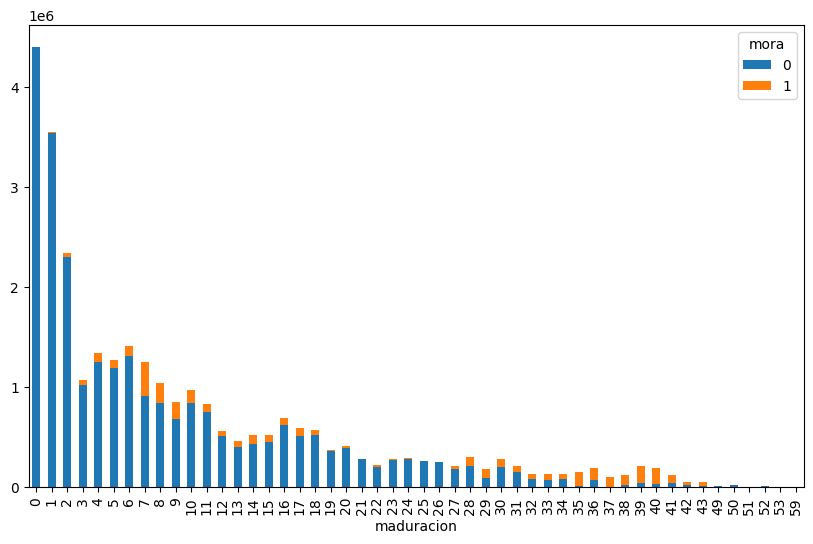

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
data.pivot_table(index='maduracion',columns='mora',aggfunc='sum',values='SALDO PRES',margins=True)[[0,1]][:-1].plot(kind='bar', stacked=True,ax=ax)

# Negocio inversion

In [ ]:
data_ni = data.copy()#.query(" PRODUCTO == 'NEGOCIO INVERSION' ")

In [ ]:
data_ni.drop('PRODUCTO', axis=1, inplace=True)

## EDA

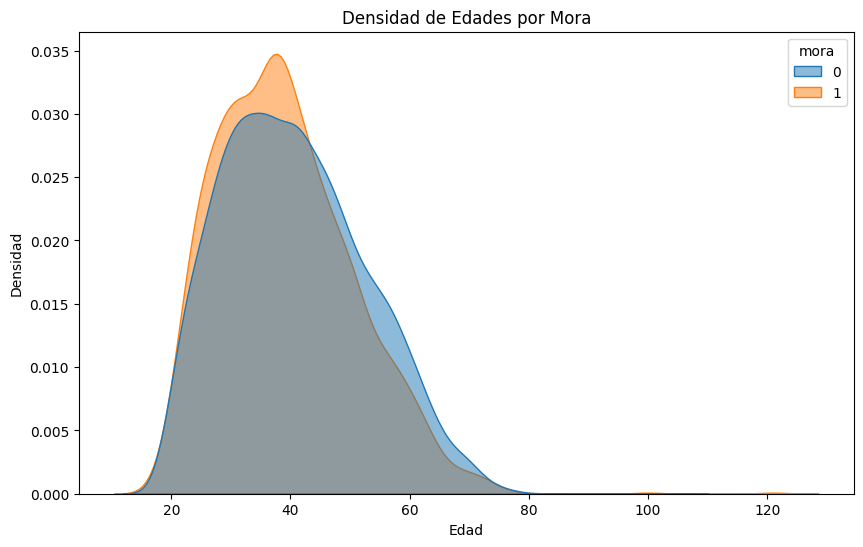

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_ni, x='EDAD', hue='mora', fill=True, common_norm=False, alpha=0.5)
plt.title('Densidad de Edades por Mora')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

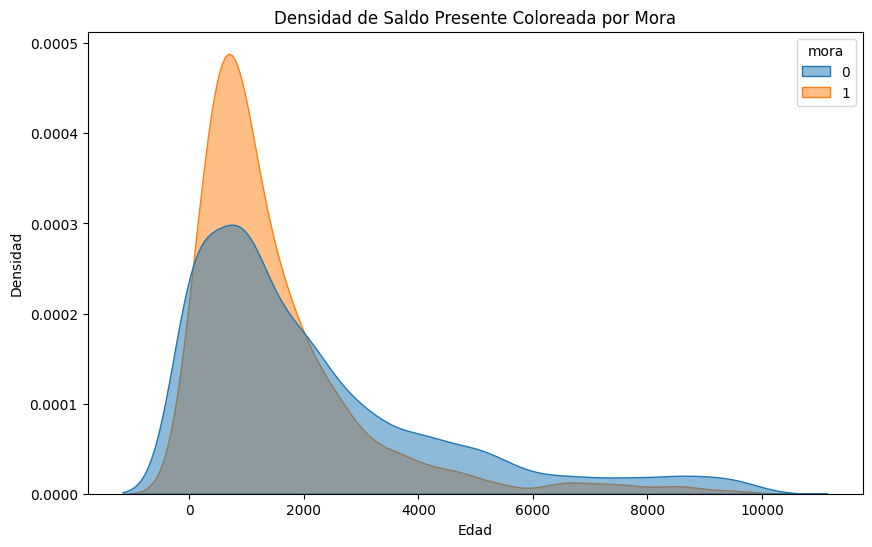

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_ni.query("`SALDO PRES` < 10000"), x='SALDO PRES', hue='mora', fill=True, common_norm=False, alpha=0.5)
plt.title('Densidad de Saldo Presente Coloreada por Mora')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

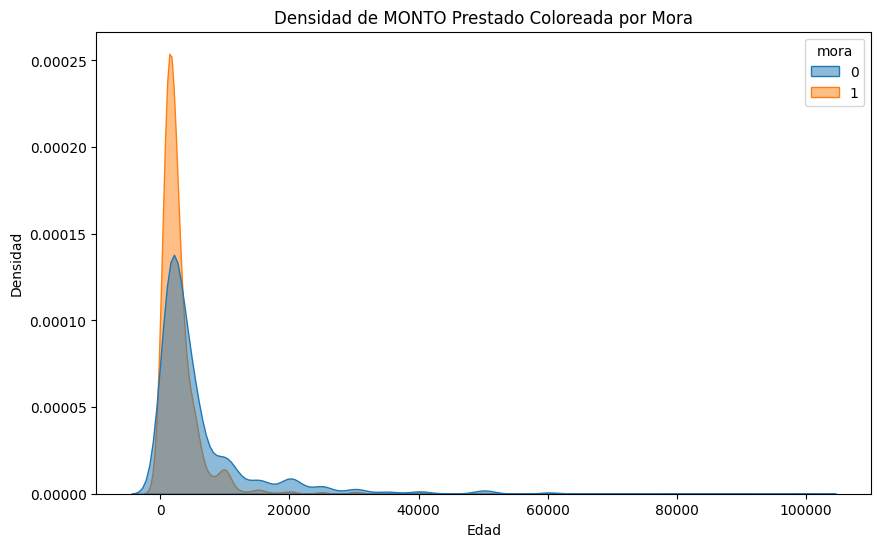

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_ni, x='MONTO PRES', hue='mora', fill=True, common_norm=False, alpha=0.5)
plt.title('Densidad de MONTO Prestado Coloreada por Mora')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

In [ ]:
data_ni

,MONTO PRES,SALDO PRES,mora,maduracion,EDAD,ESTADO_CIVIL,SEXO,AGENCIA,TIPO_VIVIENDA
0,1215.0,862.19,0,1,37,Soltero (a),M,1,PROPIA
1,3300.0,2523.43,0,1,58,Soltero (a),F,3,PROPIA
2,11120.0,10655.97,0,2,28,Soltero (a),F,1,ALQUILADA
3,890.0,452.05,1,19,40,Conviviente,F,5,FAMILIAR
4,565.0,299.46,0,1,57,Soltero (a),M,4,FAMILIAR
...,...,...,...,...,...,...,...,...,...
8615,5060.0,886.40,0,19,44,Soltero (a),M,1,PROPIA
8616,2200.0,1908.86,0,1,35,Soltero (a),F,2,FAMILIAR
8617,1660.0,1381.58,0,0,24,Soltero (a),F,8,FAMILIAR
8618,5535.0,5303.35,0,0,43,Soltero (a),M,1,ALQUILADA


<Axes: xlabel='ESTADO_CIVIL'>

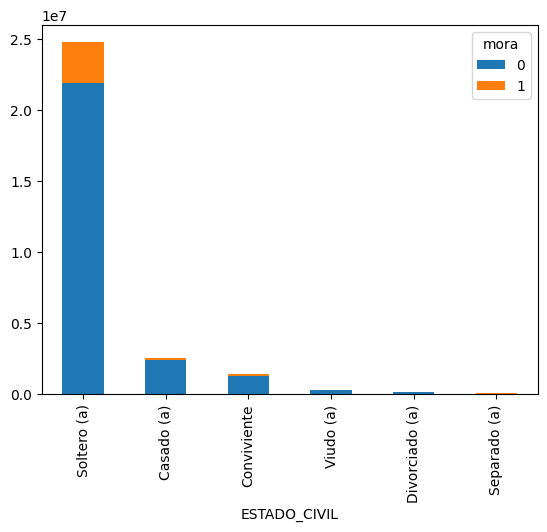

In [ ]:
data_ni.pivot_table(index='ESTADO_CIVIL',columns='mora',aggfunc='sum',values='SALDO PRES',margins=True).sort_values('All',ascending=False)[[0,1]][1:].plot(kind='bar', stacked=True)

<Axes: xlabel='SEXO'>

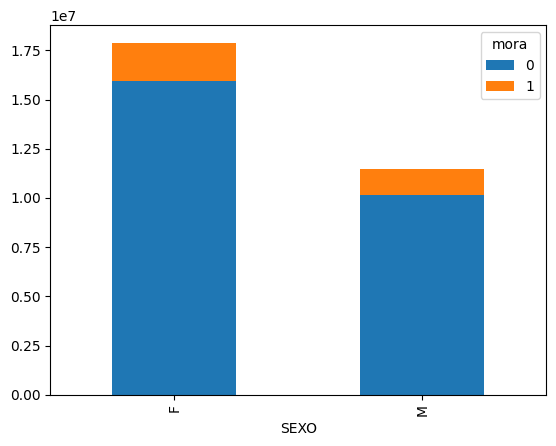

In [ ]:
data_ni.pivot_table(index='SEXO',columns='mora',aggfunc='sum',values='SALDO PRES',margins=True).sort_values('All',ascending=False)[[0,1]][1:].plot(kind='bar', stacked=True)

<Axes: xlabel='AGENCIA'>

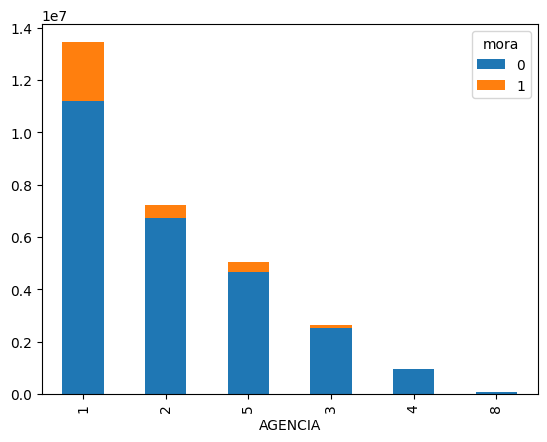

In [ ]:
data_ni.pivot_table(index='AGENCIA',columns='mora',aggfunc='sum',values='SALDO PRES',margins=True).sort_values('All',ascending=False)[[0,1]][1:].plot(kind='bar', stacked=True)

<Axes: xlabel='TIPO_VIVIENDA'>

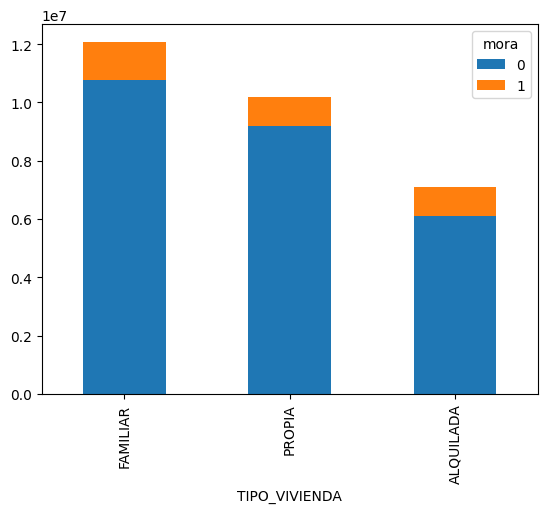

In [ ]:
data_ni.pivot_table(index='TIPO_VIVIENDA',columns='mora',aggfunc='sum',values='SALDO PRES',margins=True).sort_values('All',ascending=False)[[0,1]][1:].plot(kind='bar', stacked=True)

## Discretizacion

### Edades

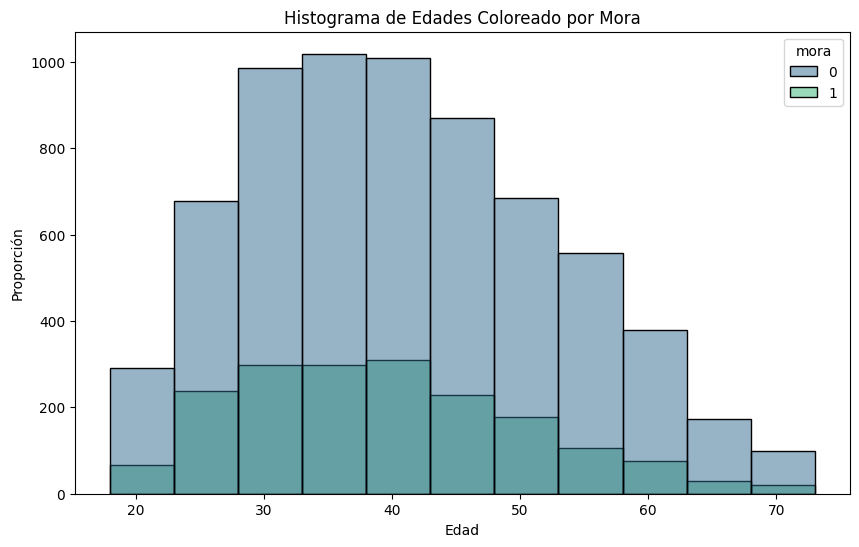

In [ ]:
bins = np.arange(18, 77, 5)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_ni, x='EDAD', hue='mora', bins=bins, palette='viridis')
plt.title('Histograma de Edades Coloreado por Mora')
plt.xlabel('Edad')
plt.ylabel('Proporción')
plt.show()

In [ ]:
bins

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73])

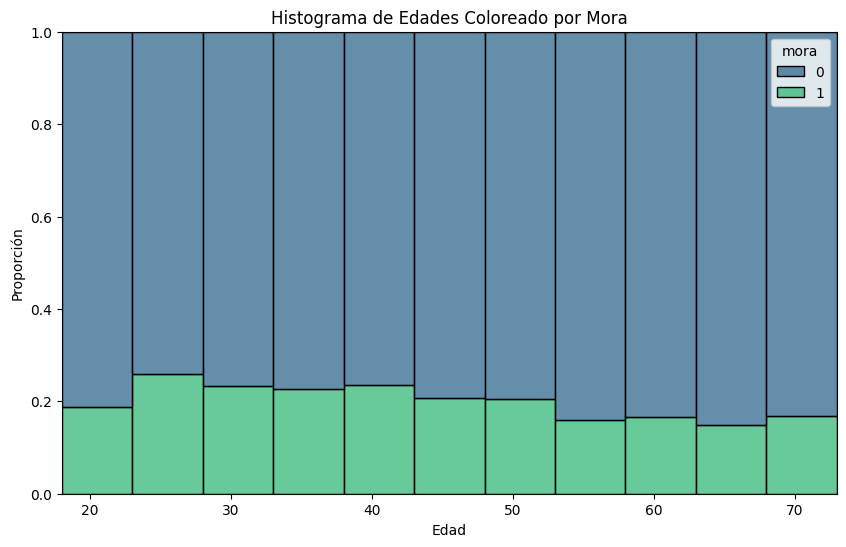

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_ni, x='EDAD', hue='mora', bins=bins, multiple='fill', palette='viridis')
plt.title('Histograma de Edades Coloreado por Mora')
plt.xlabel('Edad')
plt.ylabel('Proporción')
plt.show()

### Monto Prestado

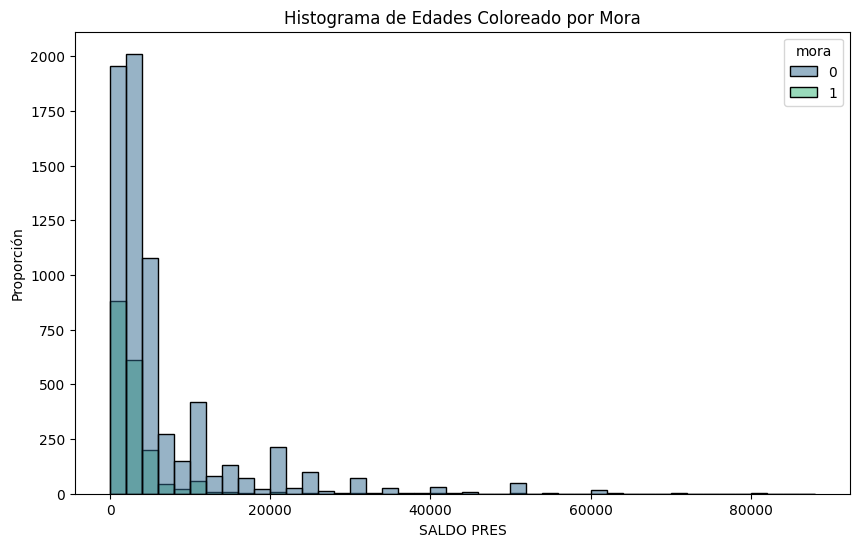

In [ ]:
bins = [-np.Inf, 1000, 2000, 5000, 10000, np.Inf]
bins = np.arange(0, 9e4, 2e3)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_ni, x='MONTO PRES', hue='mora', bins=bins, palette='viridis')
plt.title('Histograma de Edades Coloreado por Mora')
plt.xlabel('SALDO PRES')
plt.ylabel('Proporción')
plt.show()

In [ ]:
bins

array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
       16000., 18000., 20000., 22000., 24000., 26000., 28000., 30000.,
       32000., 34000., 36000., 38000., 40000., 42000., 44000., 46000.,
       48000., 50000., 52000., 54000., 56000., 58000., 60000., 62000.,
       64000., 66000., 68000., 70000., 72000., 74000., 76000., 78000.,
       80000., 82000., 84000., 86000., 88000.])

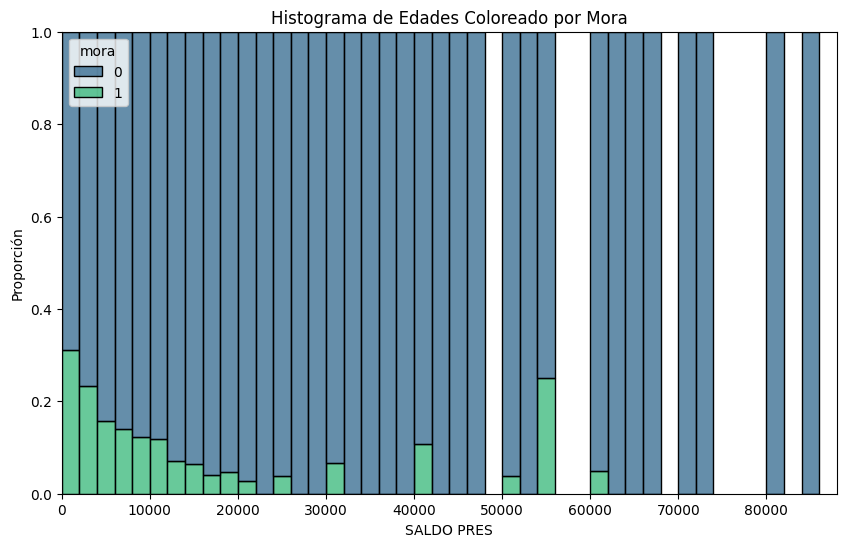

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_ni, x='MONTO PRES', hue='mora', bins=bins, multiple='fill', palette='viridis')
plt.title('Histograma de Edades Coloreado por Mora')
plt.xlabel('SALDO PRES')
plt.ylabel('Proporción')
plt.show()

### Saldo

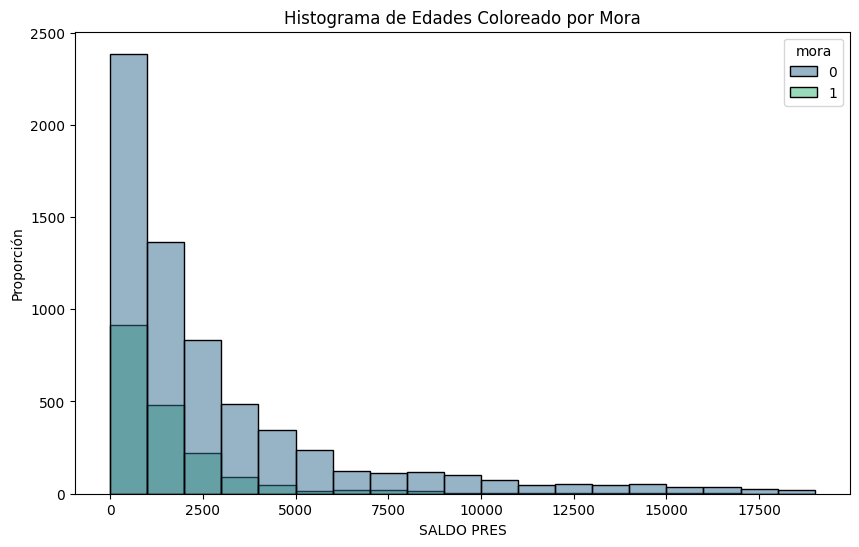

In [ ]:
bins = [-np.Inf, 1000, 2000, 5000, 10000, np.Inf]
bins = np.arange(0, 2e4, 1e3)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_ni, x='SALDO PRES', hue='mora', bins=bins, palette='viridis')
plt.title('Histograma de Edades Coloreado por Mora')
plt.xlabel('SALDO PRES')
plt.ylabel('Proporción')
plt.show()

In [ ]:
bins

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
       16000., 17000., 18000., 19000.])

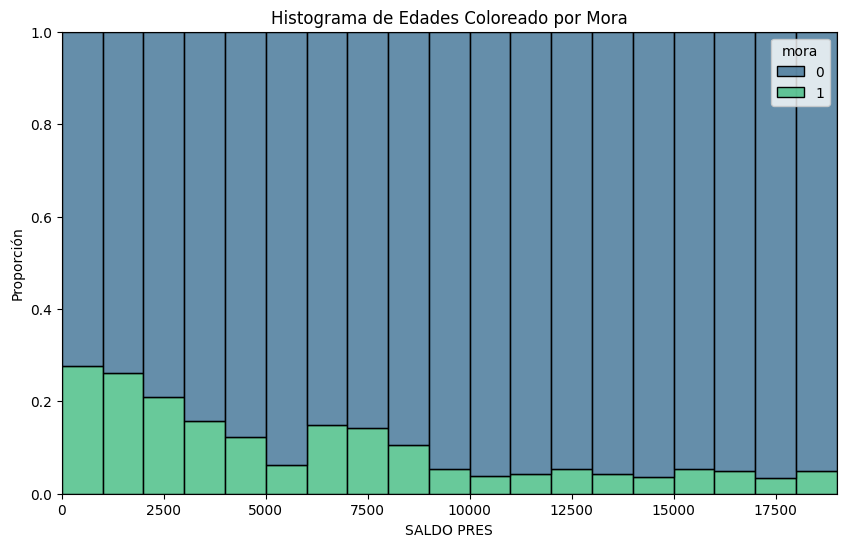

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_ni, x='SALDO PRES', hue='mora', bins=bins, multiple='fill', palette='viridis')
plt.title('Histograma de Edades Coloreado por Mora')
plt.xlabel('SALDO PRES')
plt.ylabel('Proporción')
plt.show()

### Maduracion

In [ ]:
data_ni.maduracion.describe()

count    8620.000000
mean        7.968213
std         9.776783
min         0.000000
25%         1.000000
50%         5.000000
75%        10.000000
max        59.000000
Name: maduracion, dtype: float64

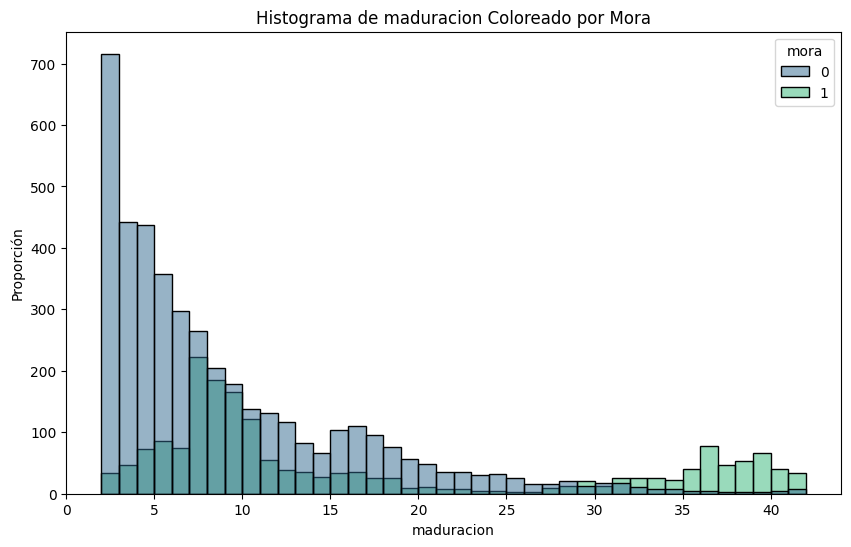

In [ ]:
bins = [-np.Inf, 1000, 2000, 5000, 10000, np.Inf]
bins = np.arange(2, 43, 1)
plt.figure(figsize=(10, 6))
sns.histplot(data=data_ni, x='maduracion', hue='mora', bins=bins, palette='viridis')
plt.title('Histograma de maduracion Coloreado por Mora')
plt.xlabel('maduracion')
plt.ylabel('Proporción')
plt.show()

In [ ]:
bins

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42])

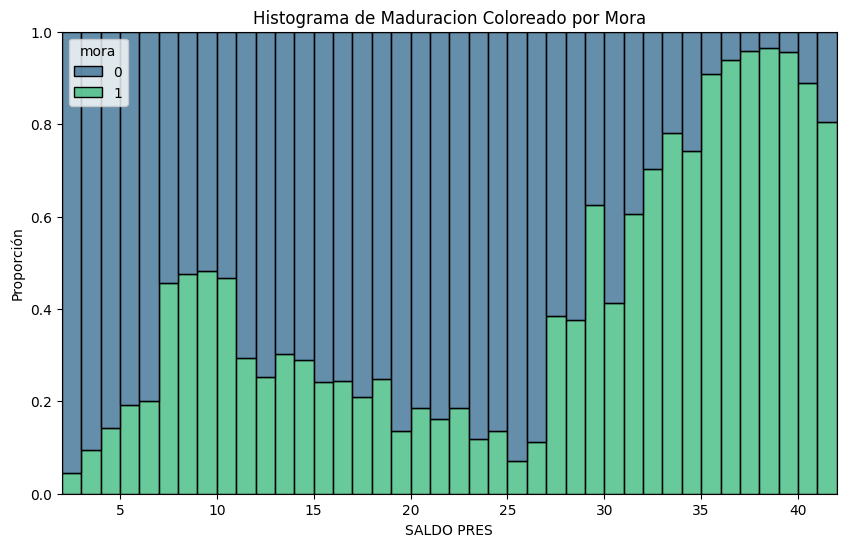

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_ni, x='maduracion', hue='mora', bins=bins, multiple='fill', palette='viridis')
plt.title('Histograma de Maduracion Coloreado por Mora')
plt.xlabel('SALDO PRES')
plt.ylabel('Proporción')
plt.show()

## Modelos

### Seleccion de variables

In [ ]:
data_ni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MONTO PRES     8620 non-null   float64
 1   SALDO PRES     8620 non-null   float64
 2   mora           8620 non-null   int64  
 3   maduracion     8620 non-null   int32  
 4   EDAD           8620 non-null   int64  
 5   ESTADO_CIVIL   8620 non-null   object 
 6   SEXO           8620 non-null   object 
 7   AGENCIA        8620 non-null   int64  
 8   TIPO_VIVIENDA  8620 non-null   object 
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 572.5+ KB


In [ ]:
y_var = ['mora']

In [ ]:
var_cuali = ['ESTADO_CIVIL','SEXO','AGENCIA','TIPO_VIVIENDA']

In [ ]:
for v in var_cuali:
  data_ni[v] = data_ni[v].astype(str)

In [ ]:
data_ni = pd.get_dummies(data_ni)

In [ ]:
x_vars = data_ni.columns.to_list()
x_vars.remove(y_var[0])
x_vars

['MONTO PRES',
 'SALDO PRES',
 'maduracion',
 'EDAD',
 'ESTADO_CIVIL_Casado (a)',
 'ESTADO_CIVIL_Conviviente',
 'ESTADO_CIVIL_Divorciado (a)',
 'ESTADO_CIVIL_Separado (a)',
 'ESTADO_CIVIL_Soltero (a)',
 'ESTADO_CIVIL_Viudo (a)',
 'SEXO_F',
 'SEXO_M',
 'AGENCIA_1',
 'AGENCIA_2',
 'AGENCIA_3',
 'AGENCIA_4',
 'AGENCIA_5',
 'AGENCIA_8',
 'TIPO_VIVIENDA_ALQUILADA',
 'TIPO_VIVIENDA_FAMILIAR',
 'TIPO_VIVIENDA_PROPIA']

In [ ]:
data_ni['EDAD'].fillna(data_ni['EDAD'].mean(), inplace=True)

### Particion de la data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_ni[x_vars], data_ni[y_var], test_size=0.3, random_state=42)

### Arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
l_m = []
l_acc_train = []
l_acc_test = []
for md in range(1,15):
  tree_reg = DecisionTreeClassifier(max_depth=md).fit(X_train, y_train)
  y_pred_tr = tree_reg.predict(X_train)
  y_pred_ts = tree_reg.predict(X_test)
  acc_tr = accuracy_score(y_train,y_pred_tr)
  acc_ts = accuracy_score(y_test,y_pred_ts)
  l_m.append(md)
  l_acc_train.append(acc_tr)
  l_acc_test.append(acc_ts)

In [ ]:
result = pd.DataFrame({'train':l_acc_train, 'test':l_acc_test}, index = l_m)

<Axes: >

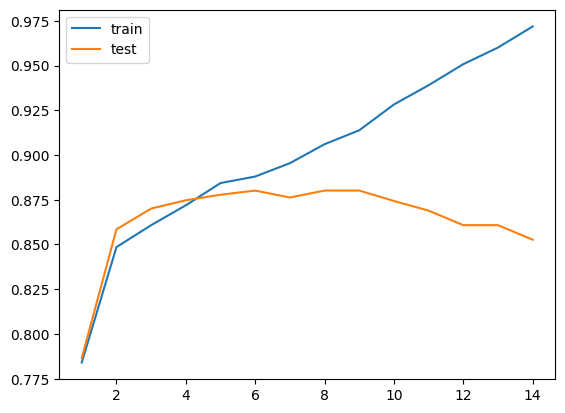

In [ ]:
result.plot()

In [ ]:
tree_reg = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

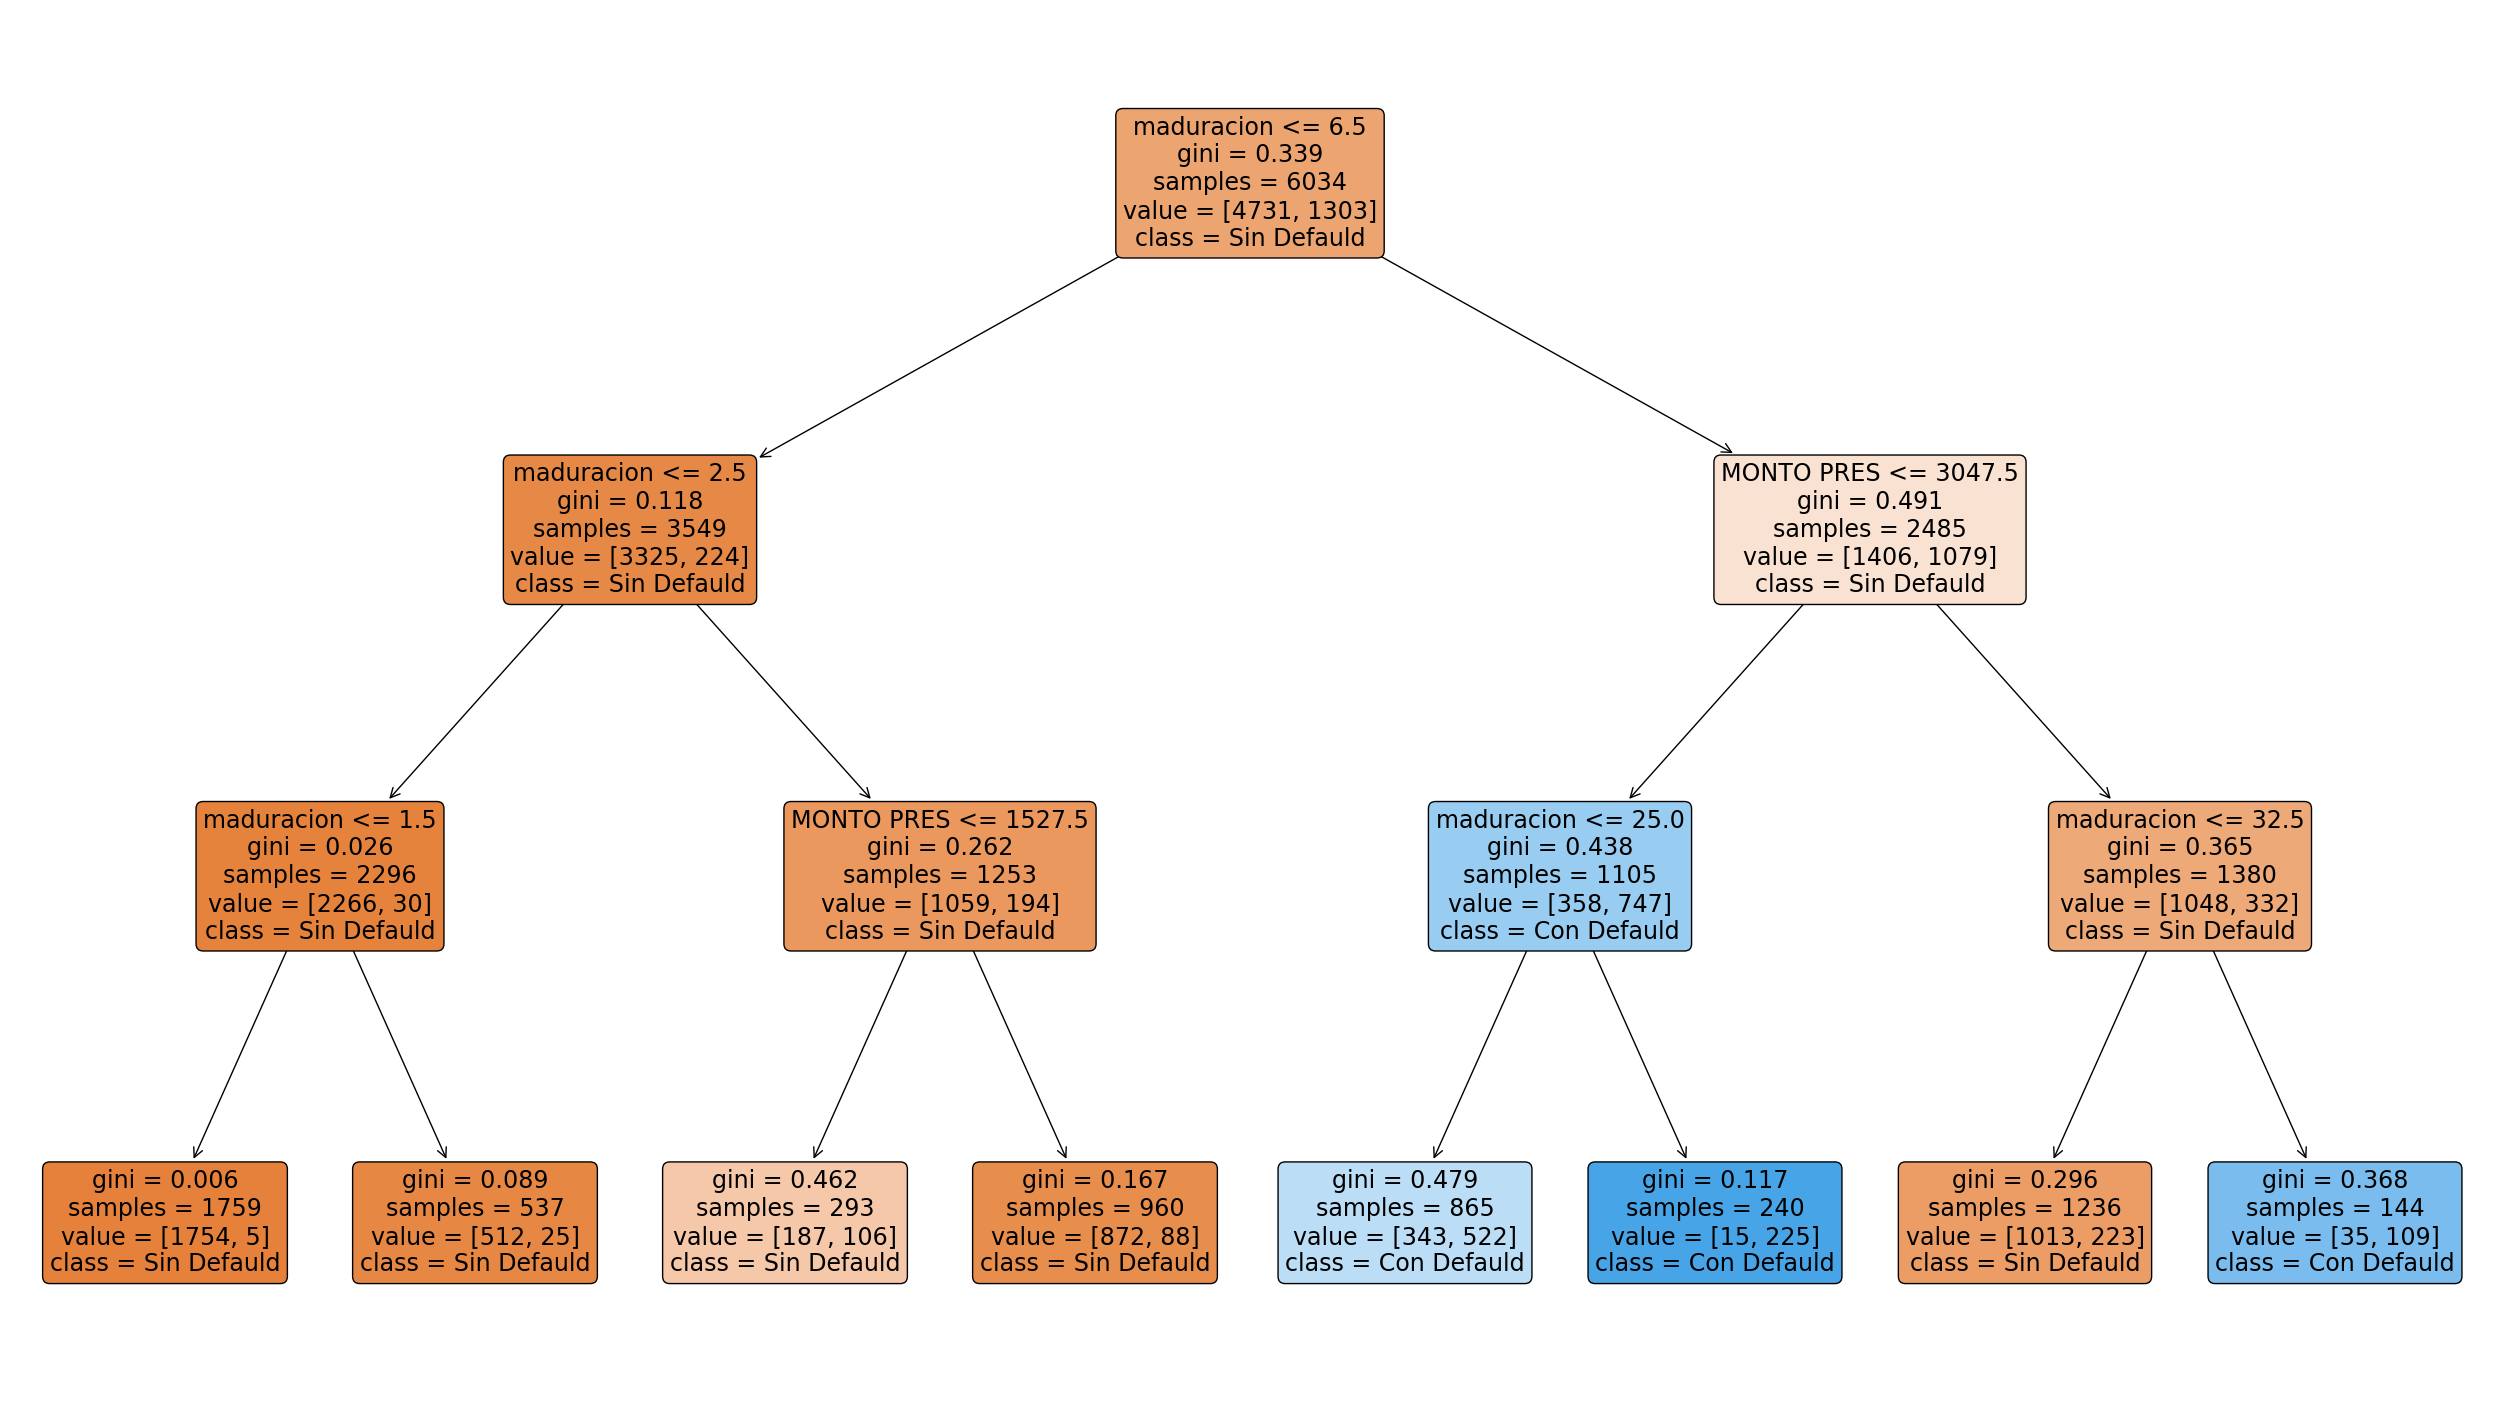

In [ ]:
plt.figure(figsize=(16*2, 9*2))
plot_tree(tree_reg, filled=True, rounded=True, class_names=["Sin Defauld", "Con Defauld"], feature_names=x_vars)
plt.show()

In [ ]:
y_pred = tree_reg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Matriz de Confusión - DATOS ORIGINALES:
 [[1877  157]
 [ 179  373]]
accuracy: 0.8700696055684455
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      2034
           1       0.70      0.68      0.69       552

    accuracy                           0.87      2586
   macro avg       0.81      0.80      0.80      2586
weighted avg       0.87      0.87      0.87      2586



<ipython-input-59-5282fd472252>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-59-5282fd472252>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


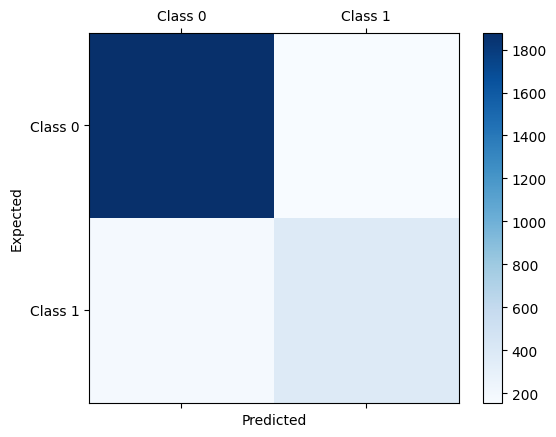

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)
print(f"accuracy: {accuracy_score(y_test,y_pred)}")
print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
l_m = []
l_est = []
l_acc_train = []
l_acc_test = []
for md in range(1,15):
  for n_tr in range(100,2200,300):
    tree_reg = RandomForestClassifier(max_depth=md,n_estimators = n_tr).fit(X_train, y_train)
    y_pred_tr = tree_reg.predict(X_train)
    y_pred_ts = tree_reg.predict(X_test)
    acc_tr = accuracy_score(y_train,y_pred_tr)
    acc_ts = accuracy_score(y_test,y_pred_ts)
    l_m.append(md)
    l_est.append(n_tr)
    l_acc_train.append(acc_tr)
    l_acc_test.append(acc_ts)

<ipython-input-56-285e815d9247>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree_reg = RandomForestClassifier(max_depth=md,n_estimators = n_tr).fit(X_train, y_train)
<ipython-input-56-285e815d9247>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree_reg = RandomForestClassifier(max_depth=md,n_estimators = n_tr).fit(X_train, y_train)
<ipython-input-56-285e815d9247>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree_reg = RandomForestClassifier(max_depth=md,n_estimators = n_tr).fit(X_train, y_train)
<ipython-input-56-285e815d9247>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

In [ ]:
result = pd.DataFrame({'train':l_acc_train, 'test':l_acc_test, 'profundidad':l_m, 'arboles':l_est})

<Axes: xlabel='profundidad'>

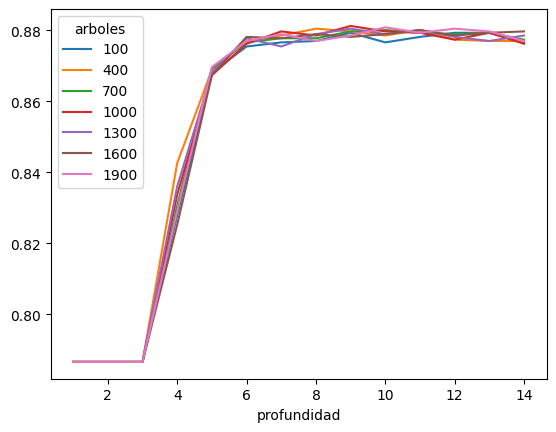

In [ ]:
result.pivot_table(index='profundidad',columns='arboles',values='test').plot()

In [ ]:
tree_reg = RandomForestClassifier(max_depth=6,n_estimators = 100).fit(X_train, y_train)

<ipython-input-59-650b0b2cb7f1>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree_reg = RandomForestClassifier(max_depth=6,n_estimators = 100).fit(X_train, y_train)


In [ ]:
y_pred = tree_reg.predict(X_test)

Matriz de Confusión - DATOS ORIGINALES:
 [[1965   69]
 [ 256  296]]
accuracy: 0.874323279195669
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2034
           1       0.81      0.54      0.65       552

    accuracy                           0.87      2586
   macro avg       0.85      0.75      0.78      2586
weighted avg       0.87      0.87      0.86      2586



<ipython-input-61-5282fd472252>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-61-5282fd472252>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


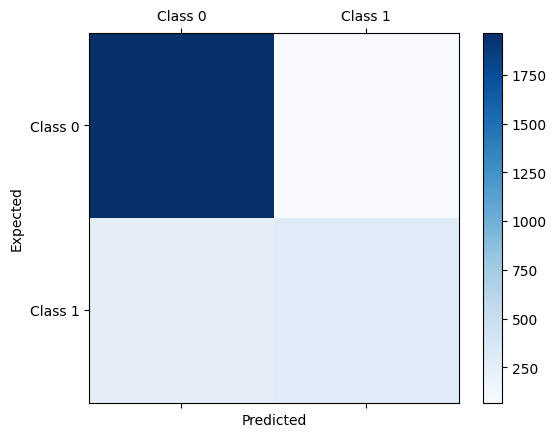

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)
print(f"accuracy: {accuracy_score(y_test,y_pred)}")
print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()